# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 8 </span>  

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

## Simulated Annealing 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"]= (11,7)

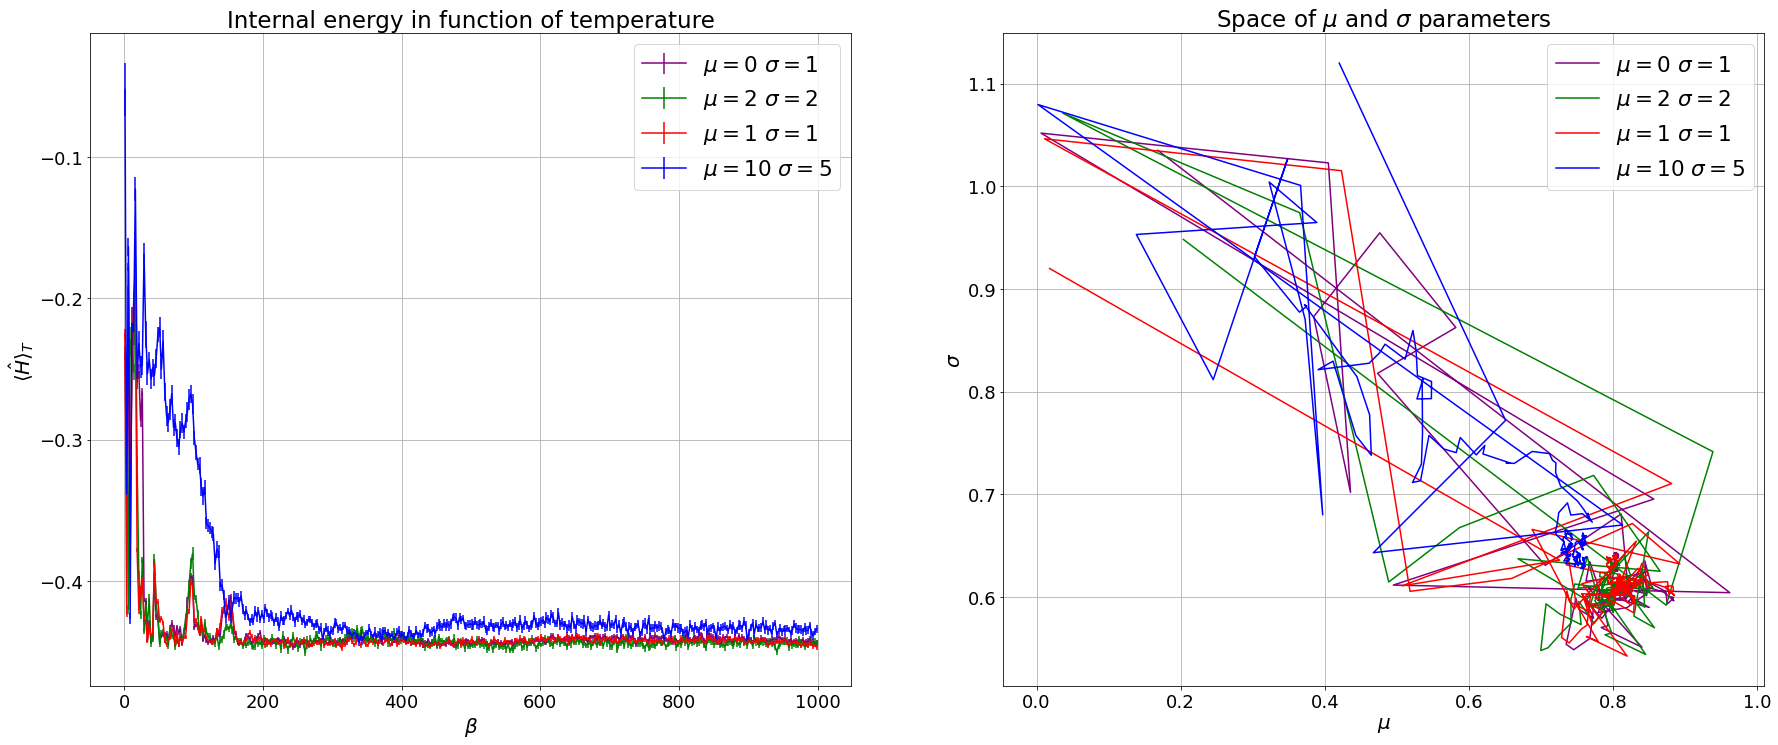

mu:	 0.800992
sigma:	 0.625835
H:	 -0.447378 	 +- 0.00195087


In [2]:
beta_1, H_1, H_err_1, mu_1, sigma_1  = np.loadtxt("simulated_annealing/annealing_H_uniform_test1.dat", unpack=True, usecols=(0,1,2,3,4), delimiter=",")
beta_2, H_2, H_err_2, mu_2, sigma_2  = np.loadtxt("simulated_annealing/annealing_H_uniform_test2.dat", unpack=True, usecols=(0,1,2,3,4), delimiter=",", skiprows=1)
beta_3, H_3, H_err_3, mu_3, sigma_3  = np.loadtxt("simulated_annealing/annealing_H_uniform_test3.dat", unpack=True, usecols=(0,1,2,3,4), delimiter=",")
beta_4, H_4, H_err_4, mu_4, sigma_4  = np.loadtxt("simulated_annealing/annealing_H_uniform_test4.dat", unpack=True, usecols=(0,1,2,3,4), delimiter=",")

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(30 , 12))

ax0.errorbar(beta_1, H_1, yerr=H_err_1, color="purple", label='$\mu=0$ $\sigma=1$')
ax0.errorbar(beta_2, H_2, yerr=H_err_2, color="green", label='$\mu=2$ $\sigma=2$')
ax0.errorbar(beta_3, H_3, yerr=H_err_3, color="red", label='$\mu=1$ $\sigma=1$')
ax0.errorbar(beta_4, H_4, yerr=H_err_4, color="blue", label='$\mu=10$ $\sigma=5$')

ax0.set_xlabel(r'$\beta$', fontsize=20)
ax0.set_ylabel(r'$\langle {\hat H} \rangle_T$', fontsize=20)
ax0.grid(True)
ax0.set_title('Internal energy in function of temperature',fontsize=23)
ax0.legend(loc=1, fontsize="larger")

ax1.plot(mu_1, sigma_1, color="purple", label='$\mu=0$ $\sigma=1$')
ax1.plot(mu_2, sigma_2, color="green", label='$\mu=2$ $\sigma=2$')
ax1.plot(mu_3, sigma_3, color="red", label='$\mu=1$ $\sigma=1$')
ax1.plot(mu_4, sigma_4, color="blue", label='$\mu=10$ $\sigma=5$')

ax1.set_xlabel(r'$\mu$', fontsize=20)
ax1.set_ylabel(r'$\sigma$', fontsize=20)
ax1.grid(True)
ax1.set_title(r'Space of $\mu$ and $\sigma$ parameters',fontsize=23)
ax1.legend(loc=1, fontsize="larger")

plt.show()

print('mu:\t',mu_3[-1])
print('sigma:\t',sigma_3[-1])
print('H:\t', H_3[-1],  '\t', "+-", H_err_3[-1])

I grafici mostrano i tentivi di ottimizzazione dei parametri $\mu$ e $\sigma$ tramite l'utilizzo di un algoritmo di Simulated Annealing. Il valore medio dell'energia dello stato fondamentale: 
$$
\langle {\hat H} \rangle_T^0 = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = E_{0}\; ,
$$

è stata valutata, campionando, con una probabilità di transizione uniforme $T(x_{new}|x_{old})$, la funzione d'onda $|\Psi_T^{\sigma,\mu}(x)|^2$ :

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}\; .
$$

Il valore medio di $H$ è stato ricavato tramite media blocchi con un totale di $N=125$ blocchi con $L=2000$ estrazioni per blocco. 

Per determinare i parametri che ottimizzano il problema (ossia che mi determinano lo stato fondamentale) ho utilizzato un algoritmo Simulated Annealing (SA) partendo da una temperatura inziale $\beta=1$. Ad ogni ciclo del SA ho aumentato la temperatura di $2\beta_{iniziale}$, invece il corrispondente numero di passi a cui campionare l'energia è stato via via ridotto a partire da $step_{\beta0}=1000$. La scelta della $\delta$ per la probabilità di transizione è stata cruciale. Essa infatti, essendo T inziale centrata in $x_{0}=0$, doveva essere, sia dell'ordine della $\mu_{inizilae}$ testata, sia sufficientemente piccola in modo tale da accettare numeorse mosse ed esplorare così meglio l'energia ad una data temperatura. Il range in cui variare i parametri da ottimizzare è stato fatto scalare con la temperatura a partire da un valore standard $\pm\sigma=\pm\mu=\pm1$ e via via riducendosi. 

Ho testo l'algoritmo di SA con $400$ temperature, partendo da 4 iniziali dei parametri: 
- $\mu=0$ $\sigma=1$,  con $\delta_{metropolis}= 4$.
- $\mu=2$ $\sigma=2$,  con $\delta_{metropolis}= 13$.
- $\mu=1$ $\sigma=1$,  con $\delta_{metropolis}= 5$.
- $\mu=10$ $\sigma=5$,  con $\delta_{metropolis}= 20$.

I risultati ottentui sono mostarti nei grafici in alto. Si vede come per tutte le configurazioni si arrivi allo stesso valore medio minimo dell'energia con circa gli stessi parametri. L'energia media per ogni temperatura è stata calcolata tramite media a blocchi di $30$ blocchi da $10000$ valori. 

Solo l'ultima configurazione trova dei valori di $\sigma$ e $\mu$ leggermente diversi dagli altri. Questo è dovuta alla distanza relativa dei dati inziali dai valori ottimizzati. Una differente scelta della varizione di temperatura ad ogni ciclo avrebbe portato a risultati più simili algli altri.

I valori finali dei parametri e dell'energia, calcolati con la terza configurazione, sono:
- $\mu=0.800992$ 
- $\sigma=0.625835$
- $H_0=-0.447\pm 0.002$

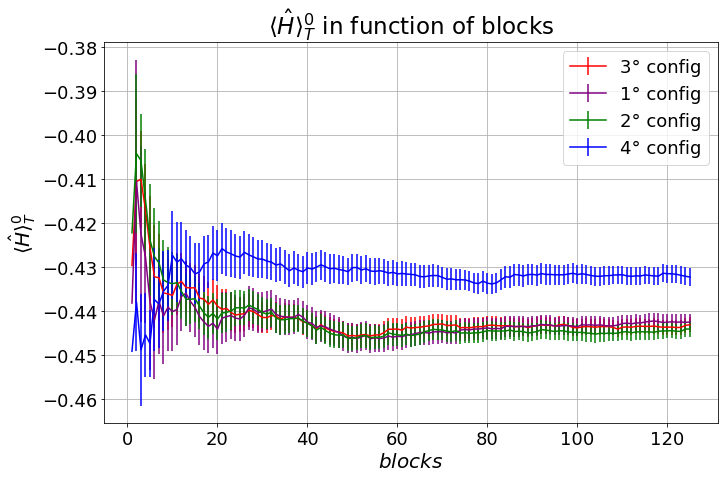

In [3]:
blocks, stima_H, average_H, H_error  = np.loadtxt("results/H_uniform_optimized_test3.dat", unpack=True, usecols=(0,1,2,3), delimiter=",")
blocks_1, stima_H_1, average_H_1, H_error_1  = np.loadtxt("results/H_uniform_optimized_test1.dat", unpack=True, usecols=(0,1,2,3), delimiter=",")
blocks_2, stima_H_2, average_H_2, H_error_2  = np.loadtxt("results/H_uniform_optimized_test2.dat", unpack=True, usecols=(0,1,2,3), delimiter=",")
blocks_4, stima_H_4, average_H_4, H_error_4  = np.loadtxt("results/H_uniform_optimized_test4.dat", unpack=True, usecols=(0,1,2,3), delimiter=",")

plt.errorbar(blocks, average_H, yerr=H_error, color="red", label='3° config')
plt.errorbar(blocks_1, average_H_1, yerr=H_error_1, color="purple", label='1° config')
plt.errorbar(blocks_2, average_H_2, yerr=H_error_2, color="green", label='2° config')
plt.errorbar(blocks_4, average_H_4, yerr=H_error_4, color="blue", label='4° config')

plt.xlabel(r'$blocks$', fontsize=20)
plt.ylabel(r'$\langle {\hat H} \rangle_T^0$', fontsize=20)
plt.grid(True)
plt.title(r'$\langle {\hat H} \rangle_T^0$ in function of blocks',fontsize=23)
plt.legend(loc=1)

plt.show()

Il grafico mostra il valor medio dell'energia dello stato fondamentale calcolato con media a blochi di $N=125$ blocchi da $L=2000$ estrazioni. Il valore già intorno a 20 blocchi satura tra $H_{up}=-0.44$ e $H_{low}=-045$ per le prime tre configurazioni testate. La quarta configurazione converge ad un valore non completamente compatibile per vià dei limiti già enunciati in precedenza. Nonostante questo i valori medi sono lonatni dal valore ideale di $H_0=-0.46$. Questo è legato ai limiti di ottimizzazione dell'algoritmo di Simulated Annealing. Quando si raggiungono intervalli troppo stretti in cui cercare i parametri l'alogoritmo di perde di efficienza.

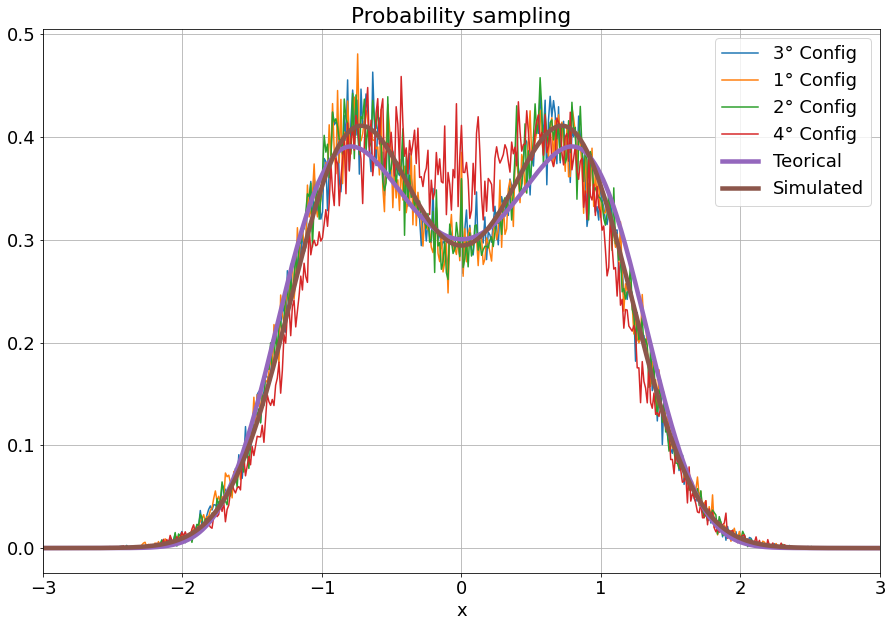

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import simps


def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#---------- Load my data-------------
x_3, phi_3  = np.loadtxt("results/psi_hysto_test3.dat", unpack=True, usecols=(0,1), delimiter=",")
x_1, phi_1  = np.loadtxt("results/psi_hysto_test1.dat", unpack=True, usecols=(0,1), delimiter=",")
x_2, phi_2  = np.loadtxt("results/psi_hysto_test2.dat", unpack=True, usecols=(0,1), delimiter=",")
x_4, phi_4  = np.loadtxt("results/psi_hysto_test4.dat", unpack=True, usecols=(0,1), delimiter=",")

norm_3 = simps(phi_3, x_3)
norm_1 = simps(phi_1, x_1)
norm_2 = simps(phi_2, x_2)
norm_4 = simps(phi_4, x_4)

#------------------------------------
#-----------Simulated----------------
mu=0.80
sigma=0.626

def Psi(x,mu,sigma):
    return np.exp( -(x+mu)**2/(2*sigma**2)) + np.exp( -(x-mu)**2/(2*sigma**2))

norm_simulated=2*np.sqrt(math.pi)*sigma*(1+np.exp(-(mu/sigma)**2))

#-----------------------------------

# Plot a few things
plt.figure(figsize=(15,10))
scale = 0.3
#plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x_3, (phi_3)/norm_3, label="3° Config", linewidth=1.5)
plt.plot(x_1, (phi_1)/norm_1, label="1° Config", linewidth=1.5)
plt.plot(x_2, (phi_2)/norm_2, label="2° Config", linewidth=1.5)
plt.plot(x_4, (phi_4)/norm_4, label="4° Config", linewidth=1.5)
plt.plot(x,(psi[0])**2, label='Teorical',linewidth=4.5)
plt.plot(x, (Psi(x,mu,sigma)**2)/norm_simulated, label='Simulated',linewidth=4.5)
plt.title("Probability sampling")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
#plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

Il grafico mostra il campionamento della funzione $|\Psi_T^{\sigma,\mu}(x)|^2$ in tre modi diversi: in manier teorica, in maniera analitica con i parametri trovati dall'ottimizzazione e costruendo degli istogrammi normalizzati dai test utilizzzati per ottimizzare il problema. Si vede che in generale c'è un buon accordo tra i dati simualti e quelli teorici ma la compatibilità non è perfetto. Questo è dovuto al fatto l'algoritmo di Simulated Annealing non mi ha permesso di ottenere i corretti parametri associati allo stato fondamentale. La differenza tra i grafici sta proprio nei differenti valori di $\mu$ e $\sigma$.